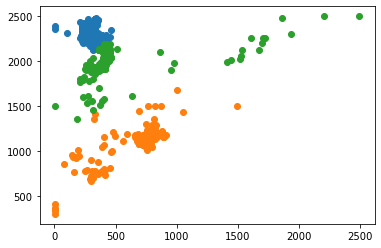

In [1]:
#3 Real world data
import math as m
import numpy as np
from matplotlib import pyplot as plt

# Extracting data from three text files
file1 = open(r"C:\Users\lenka\Desktop\Pattern Recog\real_world_data\Class1.txt","r+")
Lines1 = file1.readlines()
list1=[]
for line in Lines1:
    data=(line.strip())
    #print(data)
    first,sec=data.split(" ")
    list1.append((float(first),float(sec)))
   

file2 = open(r"C:\Users\lenka\Desktop\Pattern Recog\real_world_data\Class2.txt","r+")
Lines2 = file2.readlines()
list2=[]
for line in Lines2:
    data=(line.strip())
    #print(data)
    first,sec=data.split(" ")
    list2.append((float(first),float(sec)))

file3 = open(r"C:\Users\lenka\Desktop\Pattern Recog\real_world_data\Class3.txt","r+")
Lines3 = file3.readlines()
list3=[]
for line in Lines3:
    data=(line.strip())
    #print(data)
    first,sec=data.split(" ")
    list3.append((float(first),float(sec)))

# splitting train data and test data

traindatalist1=list1[0:m.floor(0.7*len(list1))]
traindatalist2=list2[0:m.floor(0.7*len(list2))]
traindatalist3=list3[0:m.floor(0.7*len(list3))]
testdatalist=list1[m.ceil(0.7*len(list1)):]+list2[m.ceil(0.7*len(list1)):]+list3[m.ceil(0.7*len(list1)):]
pw1=(len(traindatalist1))/(len(traindatalist1)+len(traindatalist2)+len(traindatalist3))
pw2=(len(traindatalist2))/(len(traindatalist1)+len(traindatalist2)+len(traindatalist3))
pw3=(len(traindatalist3))/(len(traindatalist1)+len(traindatalist2)+len(traindatalist3))



def lf(l,i):
    li=[]
    for j in range(len(l)):
        li.append(l[j][i])
    return li

# Extracting each feature vector to find mean and variance

class1vec1=lf(traindatalist1,0)
class1vec2=lf(traindatalist1,1)
class2vec1=lf(traindatalist2,0)
class2vec2=lf(traindatalist2,1)
class3vec1=lf(traindatalist3,0)
class3vec2=lf(traindatalist3,1)

# Finding means of features
mu11=np.mean(class1vec1)
mu12=np.mean(class1vec2)
mu21=np.mean(class2vec1)
mu22=np.mean(class2vec2)
mu31=np.mean(class3vec1)
mu32=np.mean(class3vec2)

# finding variance of features
sig11=np.var(class1vec1)
sig12=np.var(class1vec2)
sig21=np.var(class2vec1)
sig22=np.var(class2vec2)
sig31=np.var(class3vec1)
sig32=np.var(class3vec2)

varmat1=np.array([sig11,0,0,sig12]).reshape(2,2)
varmat2=np.array([sig21,0,0,sig22]).reshape(2,2)
varmat3=np.array([sig31,0,0,sig32]).reshape(2,2)
varmatdet1=np.linalg.det(varmat1)
varmatdet2=np.linalg.det(varmat2)
varmatdet3=np.linalg.det(varmat3)
varmatinv1=np.linalg.inv(varmat1)
varmatinv2=np.linalg.inv(varmat2)
varmatinv3=np.linalg.inv(varmat3)


mu1=np.array([mu11,mu12]).reshape(2,1)
mu2=np.array([mu21,mu22]).reshape(2,1)
mu3=np.array([mu31,mu32]).reshape(2,1)


testl1=[]
testl2=[]
testl3=[]
testdb=[]
def discr(x,mu,varmatinv,det,pw):
    m=np.dot(varmatinv,np.subtract(x,mu))
    
    p=np.log(det**(-0.5))-((0.5)*np.dot((x-mu).T,m))+np.log(pw)
    return p

for i in testdatalist:
    x=np.array(i).reshape(2,1)
    p1=discr(x,mu1,varmatinv1,varmatdet1,pw1)
    p2=discr(x,mu2,varmatinv2,varmatdet2,pw2)
    p3=discr(x,mu3,varmatinv3,varmatdet3,pw3)
  
    if max(p1,p2,p3)==p1:
        testl1.append(i)
    elif max(p1,p2,p3)==p2:
        testl2.append(i)
    elif max(p1,p2,p3)==p3:
        testl3.append(i)
    else:
        testdb.append(i)

plt.scatter(*zip(*testl1))
plt.scatter(*zip(*testl2))
plt.scatter(*zip(*testl3))